# Predicting Diabete using LinerRegression

# 1) import module and check database i need

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

diabetes = load_diabetes()

print(diabetes.feature_names)
print(diabetes.data)
print(diabetes.target)

df_X = diabetes.data
df_y = diabetes.target

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 13

# 2) arrange data to array

In [2]:
df_X = np.array(df_X)
df_y = np.array(df_y)

# 3) seperate test data and target data

In [19]:
#seperate test data and target data
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=7)
size_of_train_data = len(X_train)
size_of_test_data = len(X_test)
size_of_column = len(X_train[0])
print(size_of_train_data, size_of_test_data, size_of_column)

309 133 9


# 4) implement model

In [20]:
#implement model
def model(w, x, b):
    size_of_data = len(x)
    prediction = np.array([0 for i in range(size_of_data)], dtype=np.float64)
    
    for i in range(size_of_column):
        prediction += x[:, i] * w[i]
    prediction += b
    
    return prediction

# 5) implement loss function

In [21]:
#implement loss function
def MSE(y, yp):
    return ((y-yp) ** 2).mean()

def loss_MSE(w, x, b, y):
    yp = model(w, x, b)
    loss = MSE(y, yp)
    
    return loss

# 6) implement Gradient

In [22]:
#implement Gradient
def gradient(w, x, b, y):
    yp = model(w, x, b)
    size = len(x)
    gw = 2/size * x.T.dot((yp-y))
    gb = 2*(yp-y).mean()
    
    return gw, gb

# 7) fitting

In [23]:
#fitting
LEARNING_RATE = 0.1
ITERATION = 10000
w = np.random.rand(size_of_column)
b = 100

def fit(w, x, b, y, rates, mae):
    for rate in rates:
        w = np.random.rand(size_of_column)
        b = 100
        losses = []
        for i in range(0, ITERATION):
            gw = np.array([0 for j in range(size_of_column)])
            gb = 0
            
            gw, gb = gradient(w, X_train, b, y_train)

            w = w - (rate * gw)
            b = b - (rate * gb)
            losses.append(loss_MSE(w, X_train, b, y_train))

            #if i % 100 == 0:
                #print("case {0} : loss = {1}".format(i, losses[i]))
        
        plt.title("learning rate : {}".format(rate))
        plt.xlabel("iteration")
        plt.ylabel("difference")
        plt.plot(losses)
        plt.show()

        mae.append(loss_MSE(w, X_test, b, y_test))
    return w, b

# 8) learning liner model and finding good learning rate

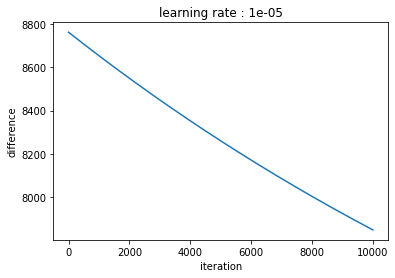

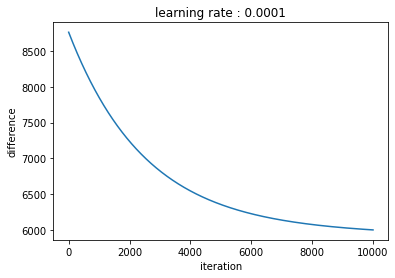

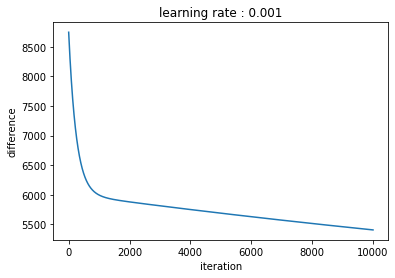

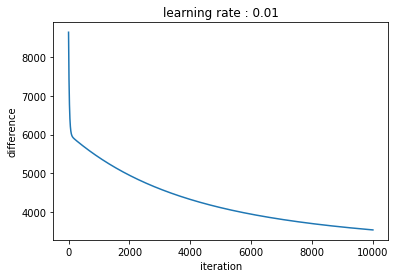

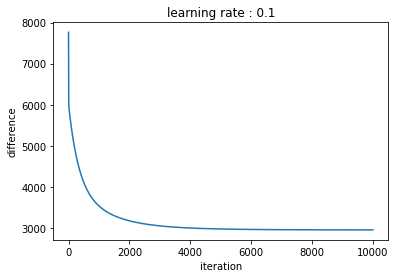

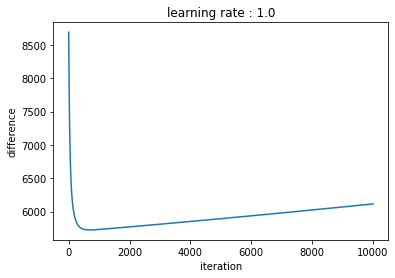

/opt/conda/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipykernel_75/391354126.py:3: RuntimeWarning: overflow encountered in square
  return ((y-yp) ** 2).mean()
/tmp/ipykernel_75/2459566398.py:19: RuntimeWarning: invalid value encountered in double_scalars
  b = b - (rate * gb)


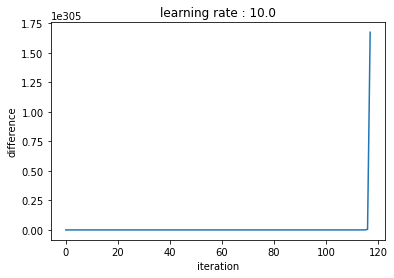

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
[7465.304086393139, 5672.149577583692, 5108.217436413107, 3220.515996398544, 2743.9190120917538, 5752.410366035893, nan]


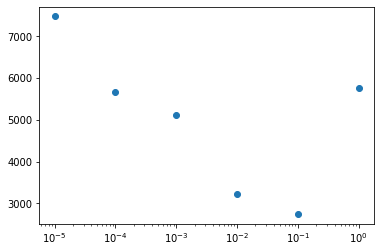

In [24]:
#learning liner model and finding good learning rate
mae_rate = []
rate = [0.00001 * (10 ** i) for i in range(7)]

w, b = fit(w, X_train, b, y_train, rate, mae_rate)

print(rate)
print(mae_rate)
plt.xscale("log")
plt.scatter(rate, mae_rate)
plt.show()

# 9) finding good combination of columns, setting learning rate is 0.1

[0.1]


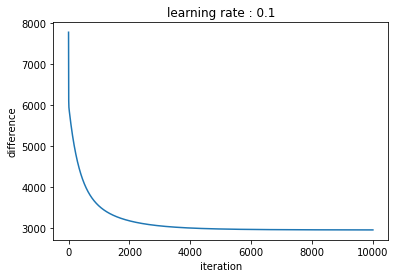

()
2743.9395266228444
[0.1]


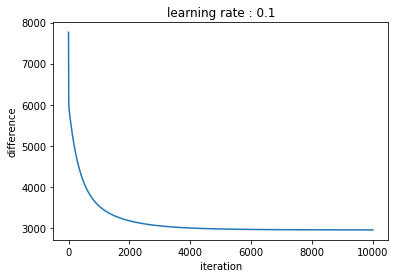

(0,)
2743.9334477787174


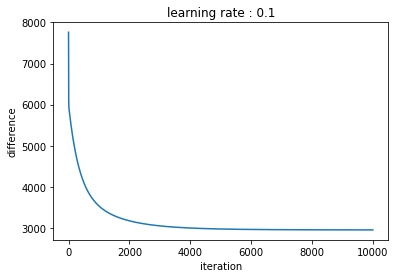

(1,)
2743.9380162062594


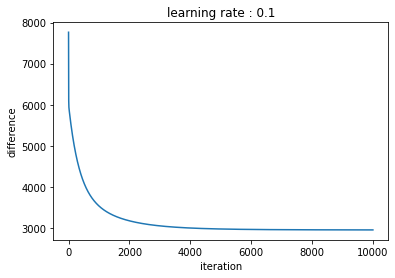

(2,)
2743.9406511265515


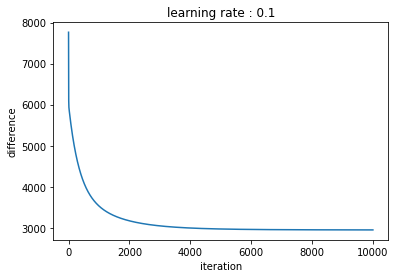

(3,)
2743.9406543661703


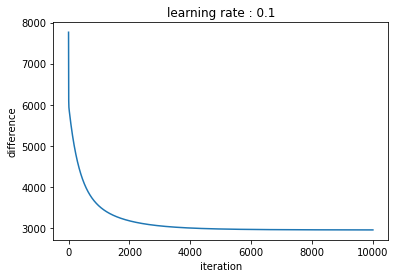

(4,)
2743.961575142707


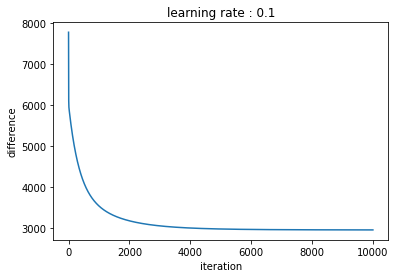

(5,)
2743.9339761784777


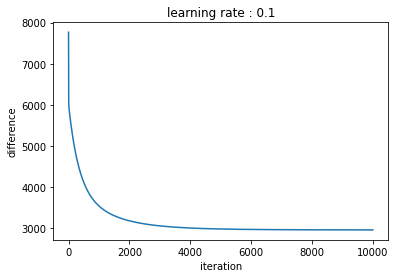

(6,)
2743.929908644319


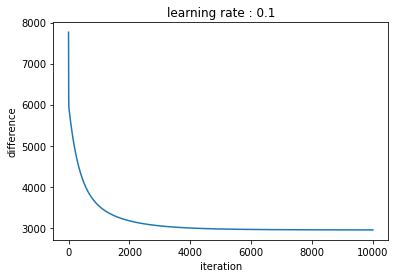

(7,)
2743.9499879997693


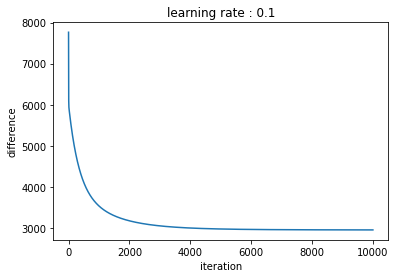

(8,)
2743.9300518968516


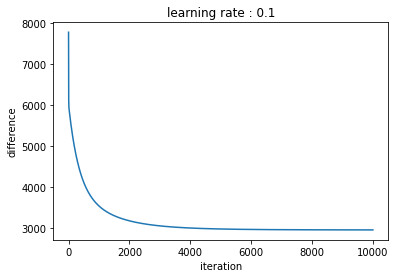

(9,)
2743.949784579413
[0.1]


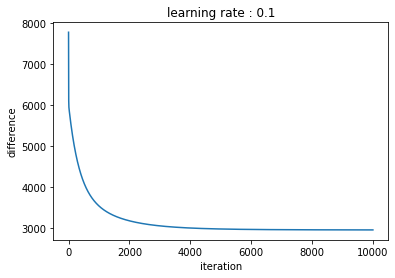

(0, 1)
2743.939793643863


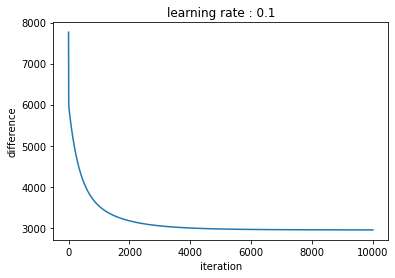

(0, 2)
2743.9300189378428


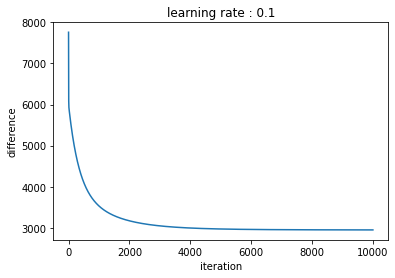

(0, 3)
2743.935548446589


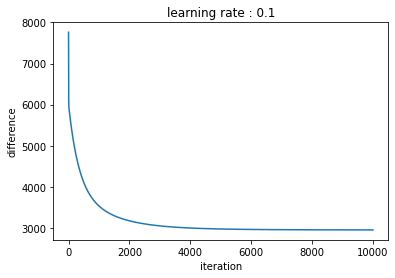

(0, 4)
2743.93522131009


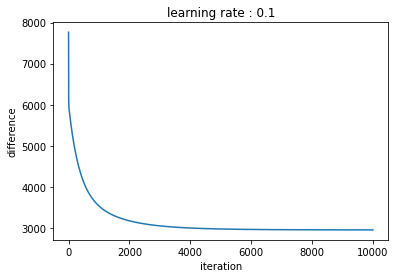

(0, 5)
2743.9312866638493


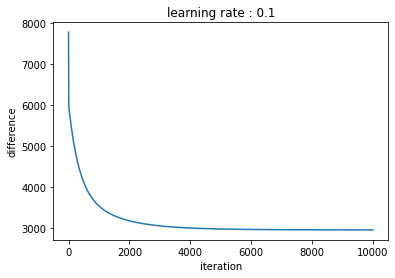

(0, 6)
2743.918083059838


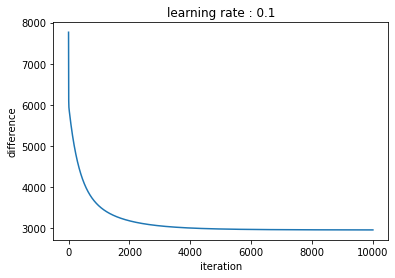

(0, 7)
2743.926384184097


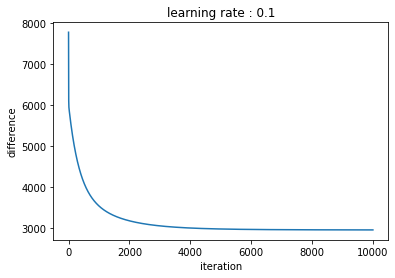

(0, 8)
2743.924386106217


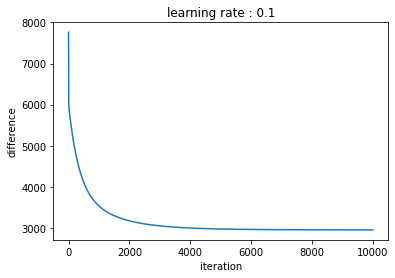

(0, 9)
2743.9436164918748


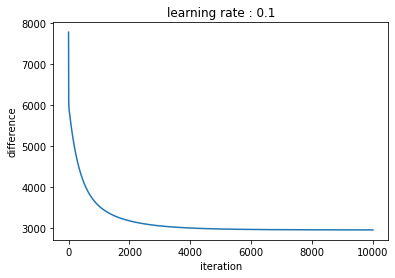

(1, 2)
2743.9413657766977


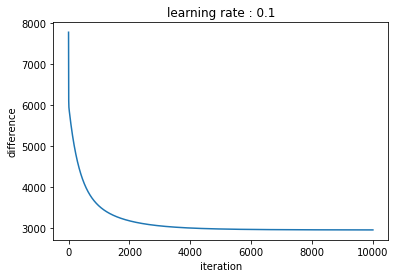

(1, 3)
2743.927246236183


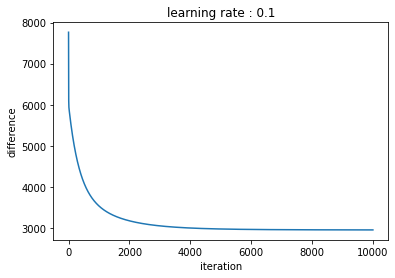

(1, 4)
2743.90735832653


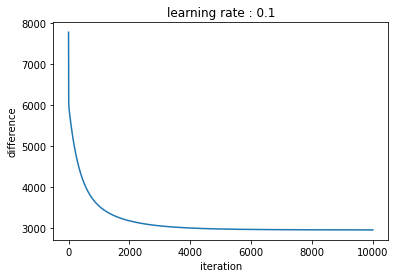

(1, 5)
2743.9254859305643


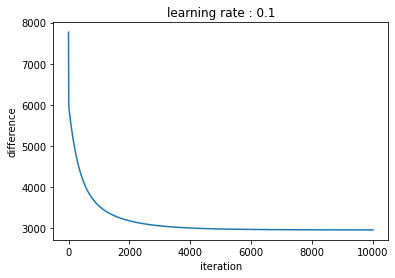

(1, 6)
2743.924144999545


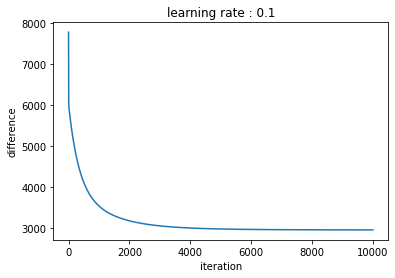

(1, 7)
2743.927520868166


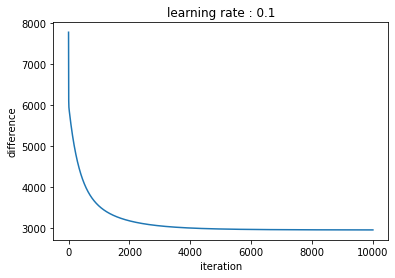

(1, 8)
2743.9176652009555


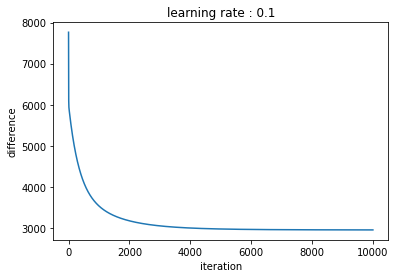

(1, 9)
2743.928841090708


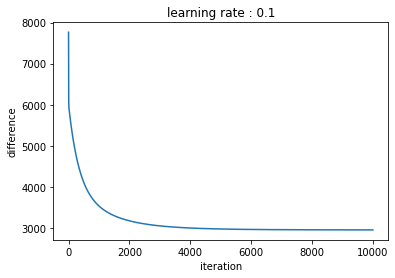

(2, 3)
2743.9301227605497


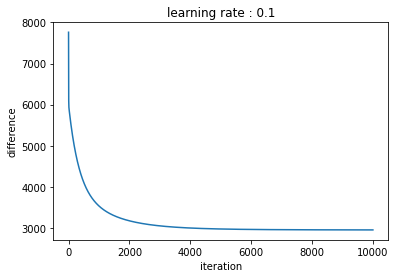

(2, 4)
2743.935383909221


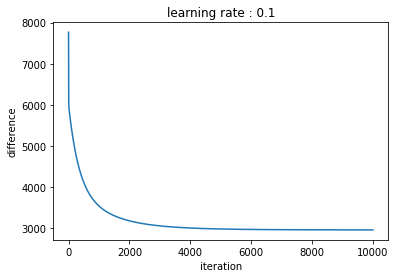

(2, 5)
2743.9155102605596


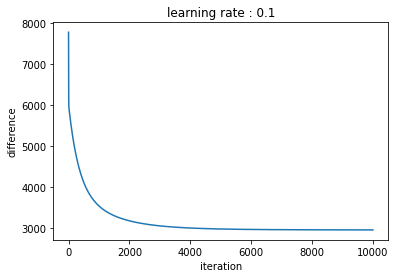

(2, 6)
2743.931189777289


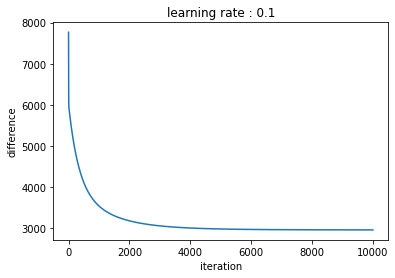

(2, 7)
2743.938518890181


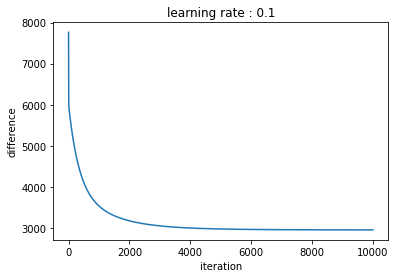

(2, 8)
2743.936100321548


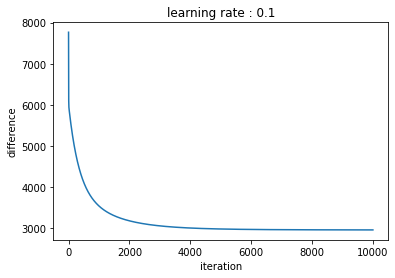

(2, 9)
2743.937986116113


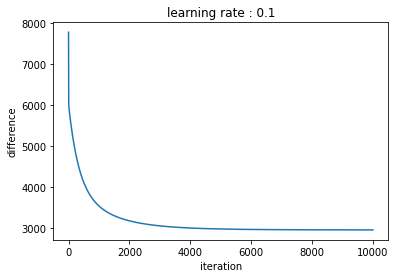

(3, 4)
2743.9365100501614


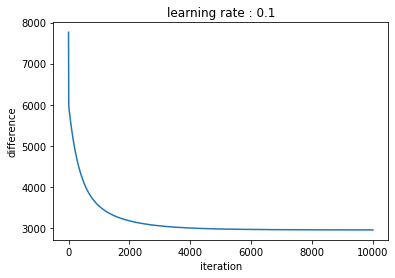

(3, 5)
2743.9463139717745


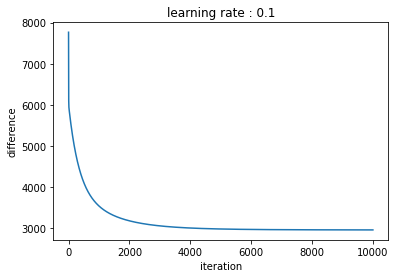

(3, 6)
2743.912966809029


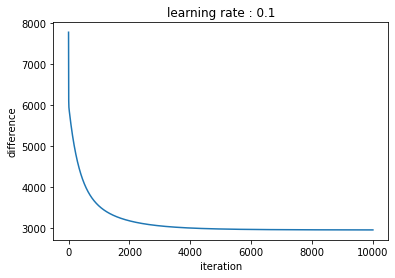

(3, 7)
2743.9409274447626


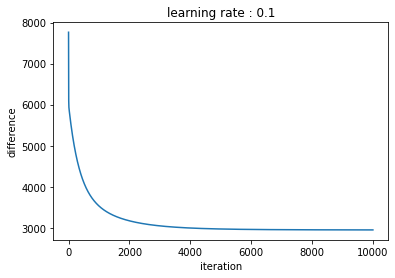

(3, 8)
2743.934688070402


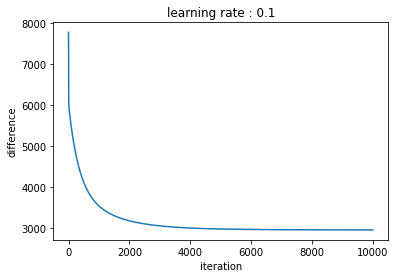

(3, 9)
2743.9155333278018


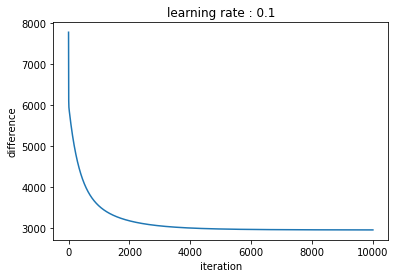

(4, 5)
2743.92107080165


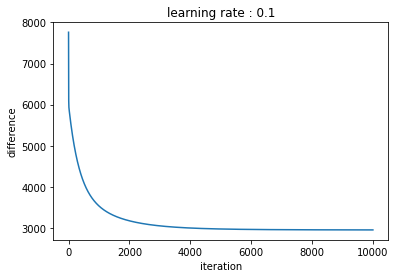

(4, 6)
2743.944065854164


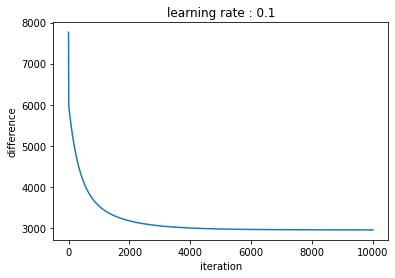

(4, 7)
2743.938227583597


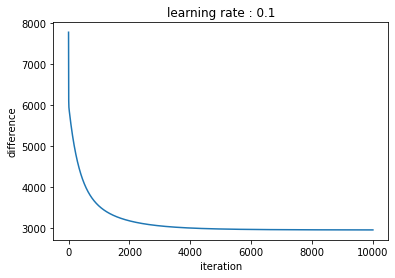

(4, 8)
2743.9494613199254


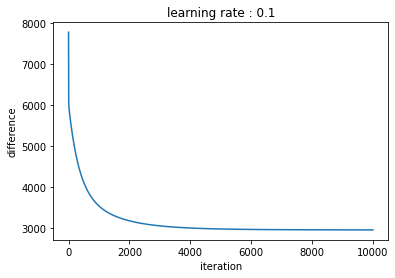

(4, 9)
2743.9383203741177


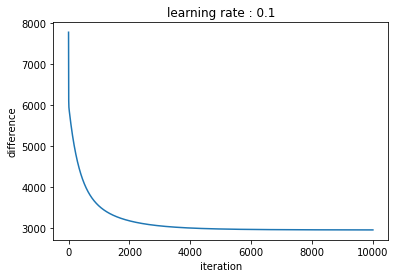

(5, 6)
2743.9196747247106


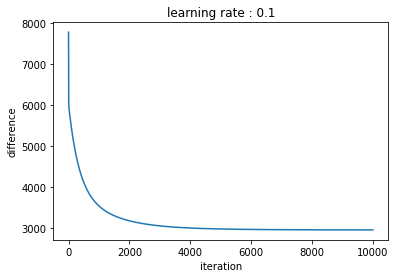

(5, 7)
2743.9145855502748


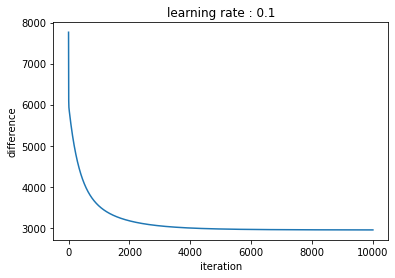

(5, 8)
2743.9358331940525


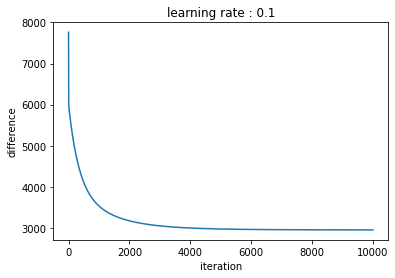

(5, 9)
2743.933454631876


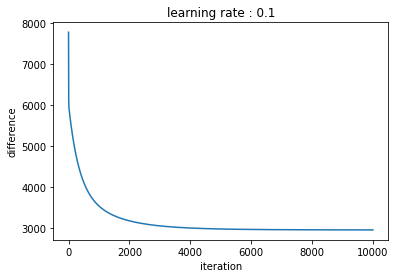

(6, 7)
2743.9369907291502


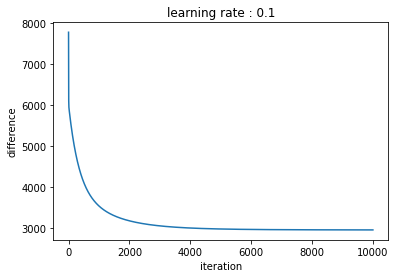

(6, 8)
2743.9388556879967


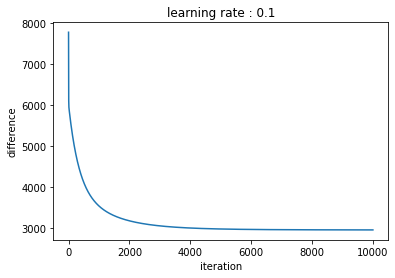

(6, 9)
2743.9283827041104


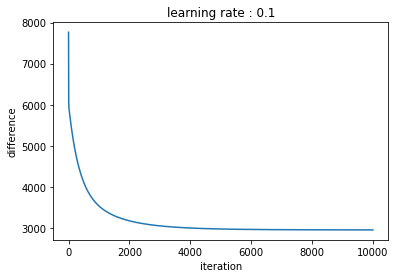

(7, 8)
2743.9351952452457


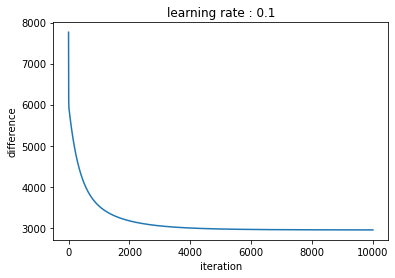

(7, 9)
2743.956440029576


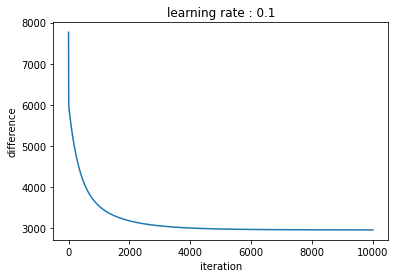

(8, 9)
2743.9199216297234
[0.1]


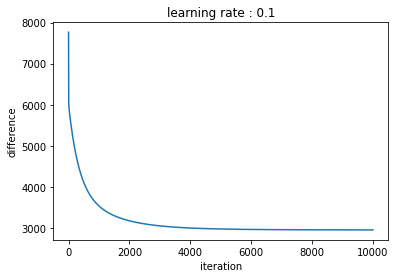

(0, 1, 2)
2743.91575968367


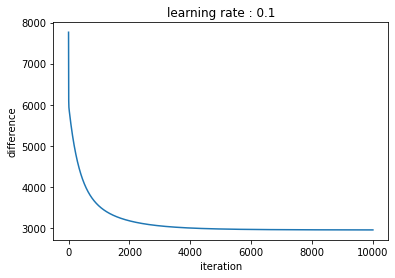

(0, 1, 3)
2743.9359663800046


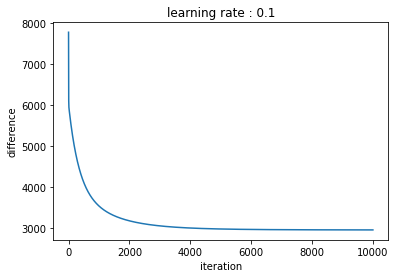

(0, 1, 4)
2743.935919599383


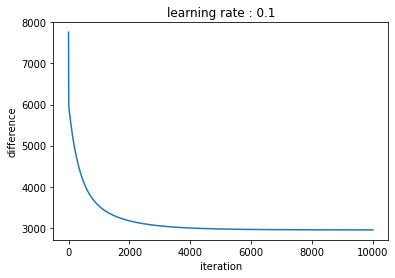

(0, 1, 5)
2743.936935712412


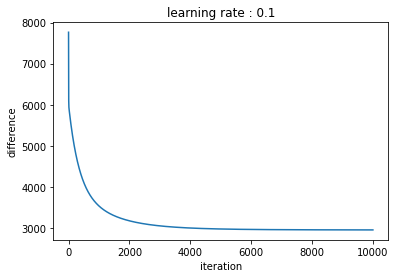

(0, 1, 6)
2743.9226640231586


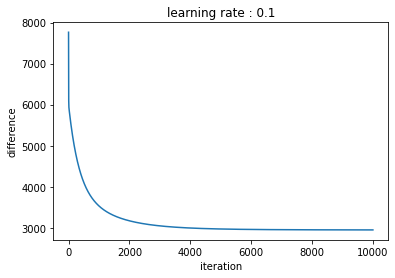

(0, 1, 7)
2743.9520987665605


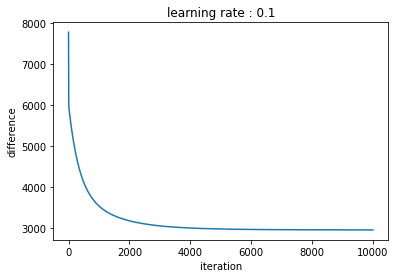

(0, 1, 8)
2743.95055564144


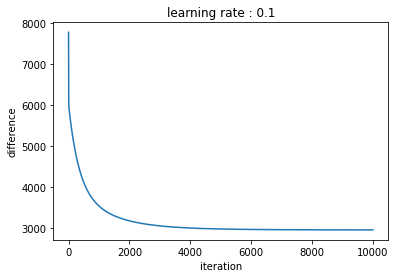

(0, 1, 9)
2743.942765345787


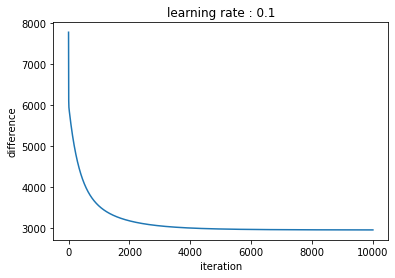

(0, 2, 3)
2743.942954141691


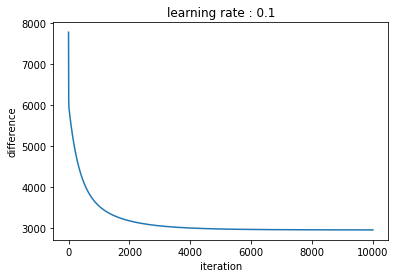

(0, 2, 4)
2743.9309031740377


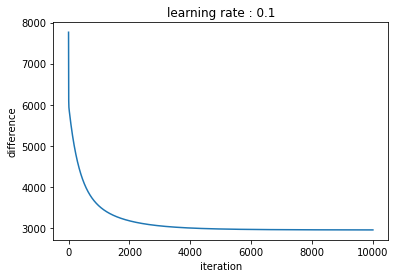

(0, 2, 5)
2743.9154946893473


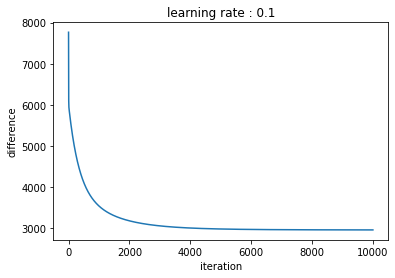

(0, 2, 6)
2743.92723059469


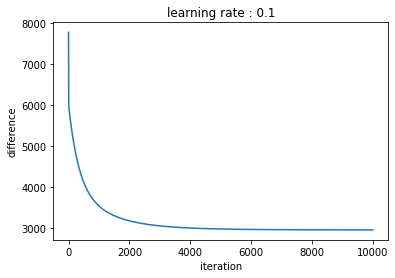

(0, 2, 7)
2743.9270646622813


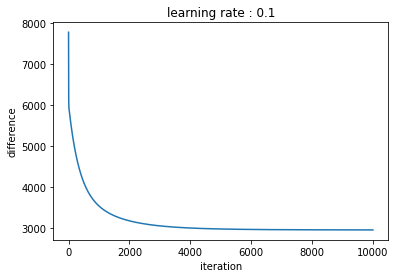

(0, 2, 8)
2743.933485023823


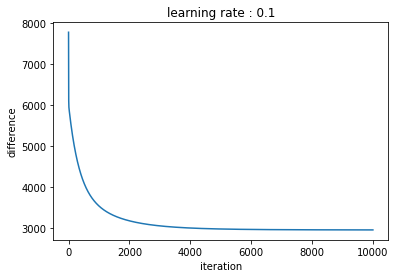

(0, 2, 9)
2743.9199592064538


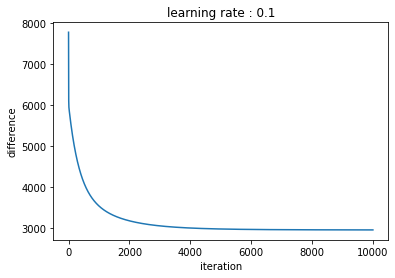

(0, 3, 4)
2743.9234789373645


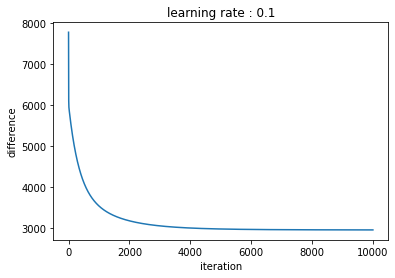

(0, 3, 5)
2743.9282373570736


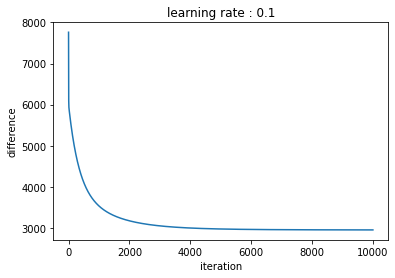

(0, 3, 6)
2743.93870485576


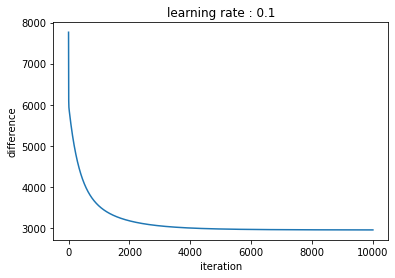

(0, 3, 7)
2743.9202361075677


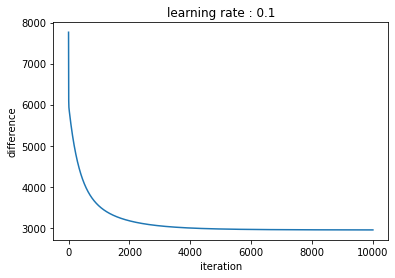

(0, 3, 8)
2743.9417982774007


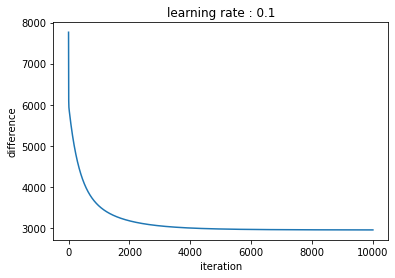

(0, 3, 9)
2743.946480708882


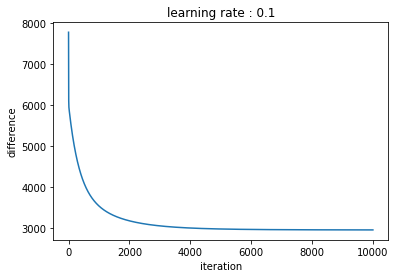

(0, 4, 5)
2743.9274759712407


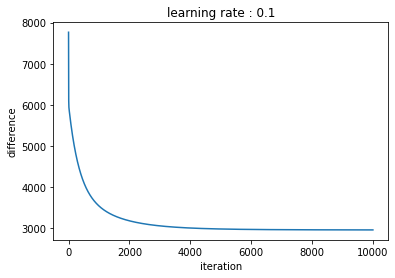

(0, 4, 6)
2743.9463659057988


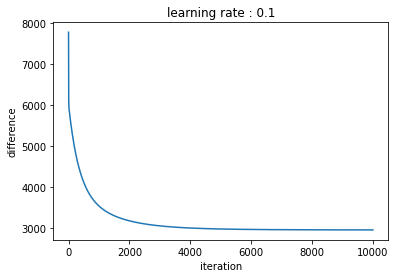

(0, 4, 7)
2743.9330435058378


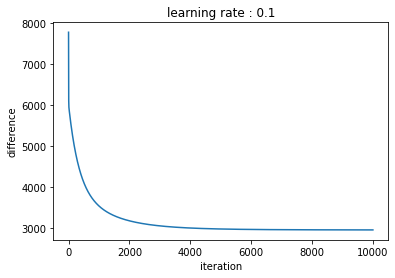

(0, 4, 8)
2743.9472420011043


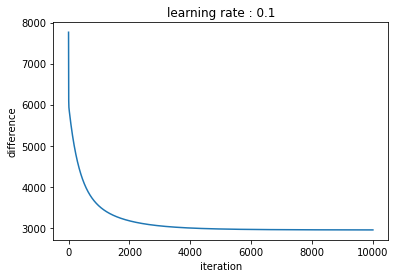

(0, 4, 9)
2743.9434254050516


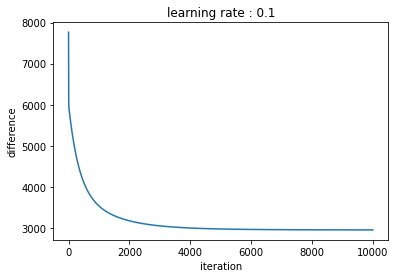

(0, 5, 6)
2743.9421974005636


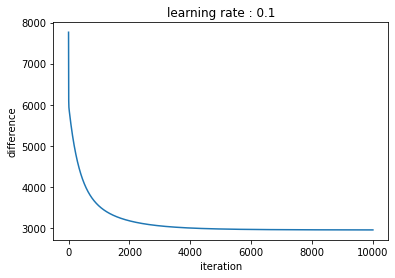

(0, 5, 7)
2743.9403921269936


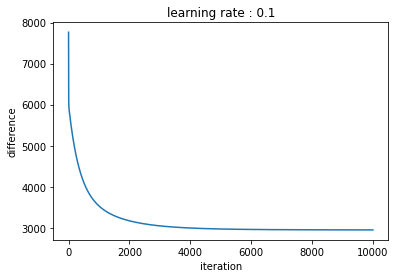

(0, 5, 8)
2743.9487458164126


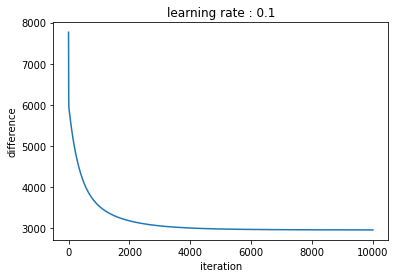

(0, 5, 9)
2743.9260116226164


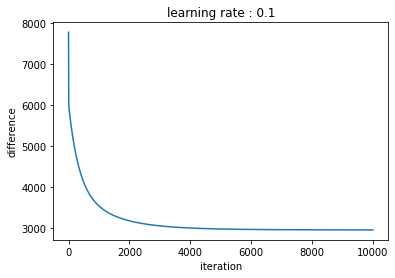

(0, 6, 7)
2743.9327386245914


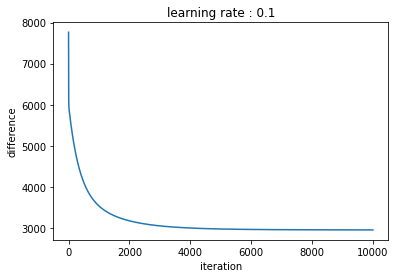

(0, 6, 8)
2743.9304778996566


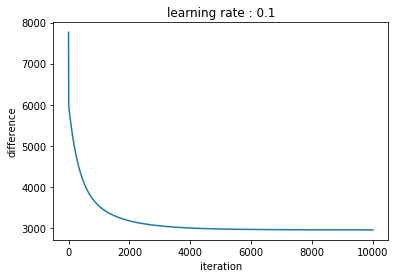

(0, 6, 9)
2743.9519563144418


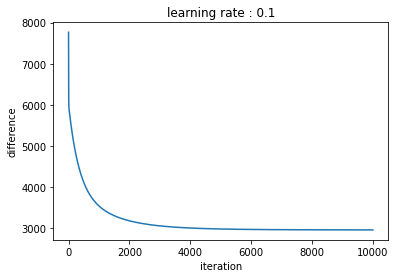

(0, 7, 8)
2743.9383149929413


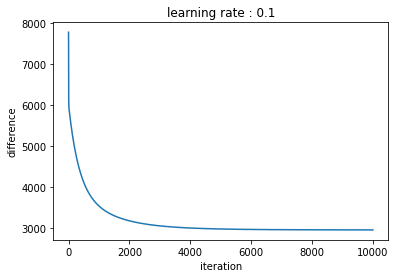

(0, 7, 9)
2743.944571738947


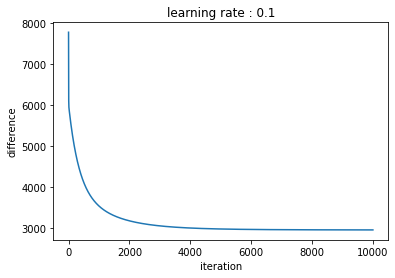

(0, 8, 9)
2743.949545763271


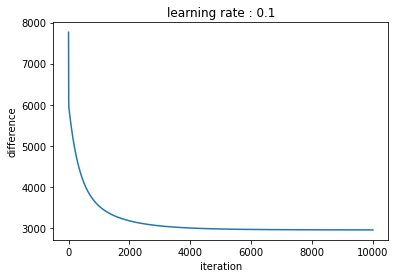

(1, 2, 3)
2743.9324201946442


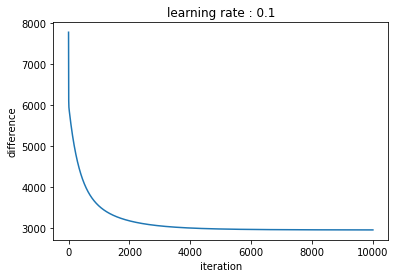

(1, 2, 4)
2743.9360288576863


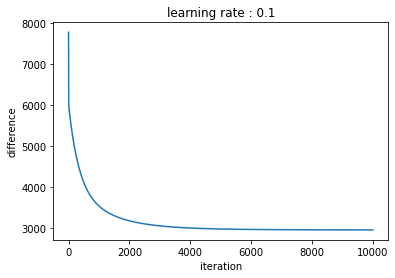

(1, 2, 5)
2743.9341903706963


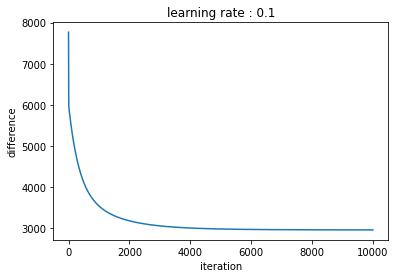

(1, 2, 6)
2743.9361578801486


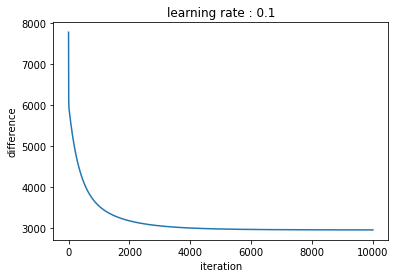

(1, 2, 7)
2743.95331342133


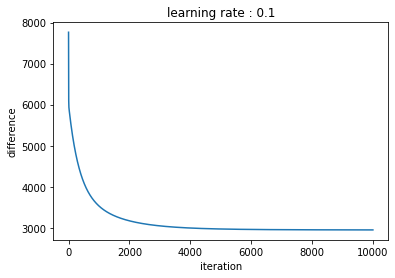

(1, 2, 8)
2743.949225908166


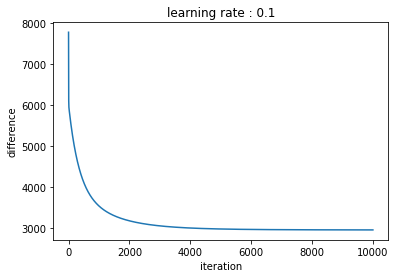

(1, 2, 9)
2743.9241975124473


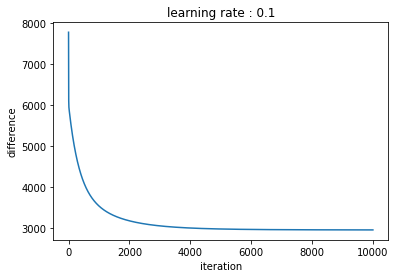

(1, 3, 4)
2743.9045928447417


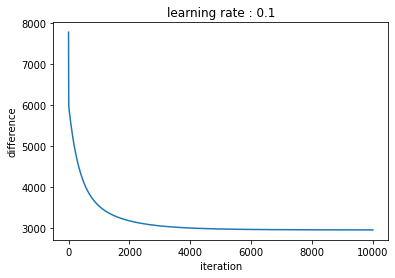

(1, 3, 5)
2743.943742435259


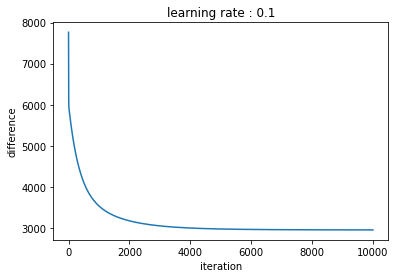

(1, 3, 6)
2743.9544795729253


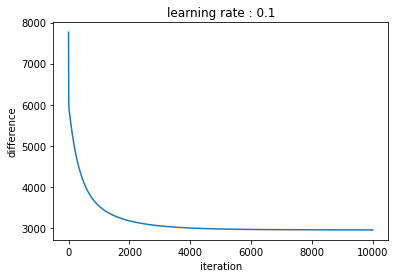

(1, 3, 7)
2743.940516603942


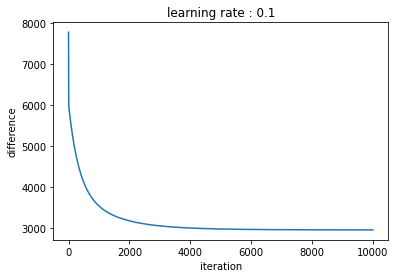

(1, 3, 8)
2743.939584538967


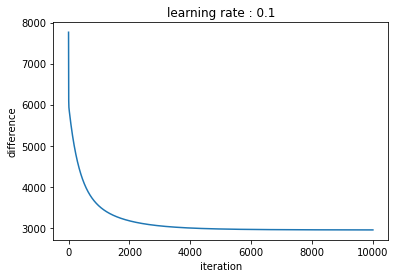

(1, 3, 9)
2743.9231790936615


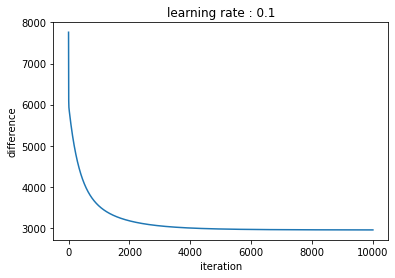

(1, 4, 5)
2743.9425290964246


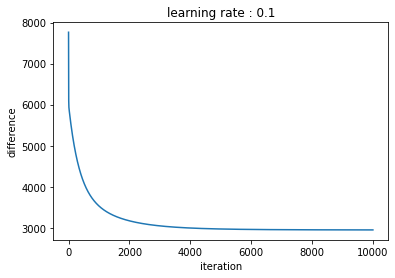

(1, 4, 6)
2743.94489497063


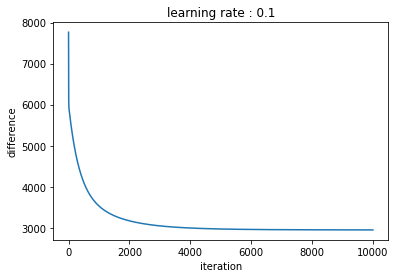

(1, 4, 7)
2743.9379921864056


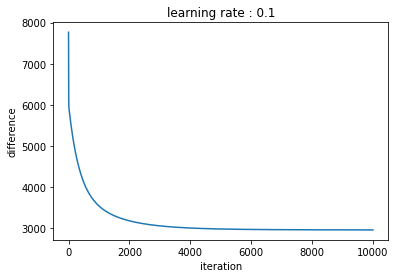

(1, 4, 8)
2743.9343797547554


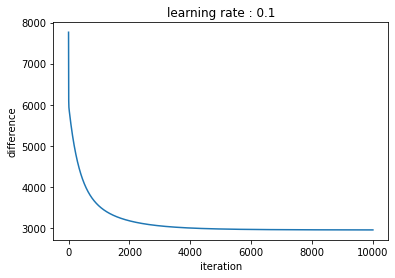

(1, 4, 9)
2743.9475318463906


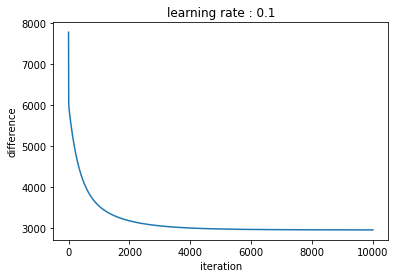

(1, 5, 6)
2743.9292752389715


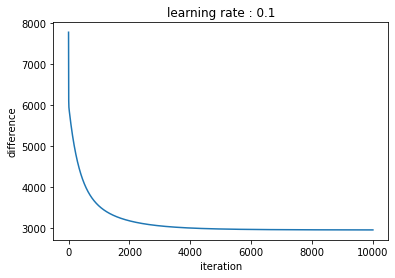

(1, 5, 7)
2743.922857679776


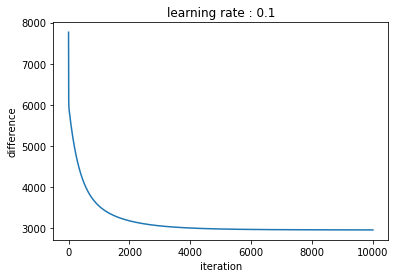

(1, 5, 8)
2743.930948478044


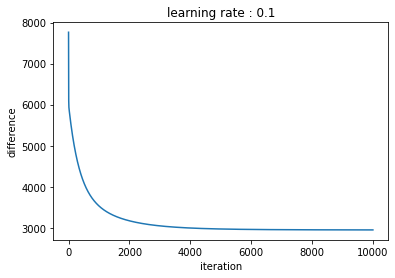

(1, 5, 9)
2743.9121808943014


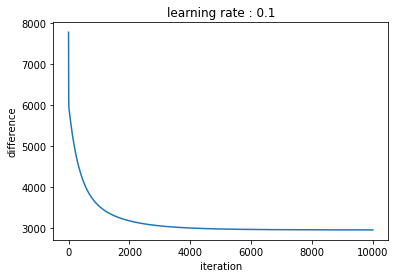

(1, 6, 7)
2743.9310226515995


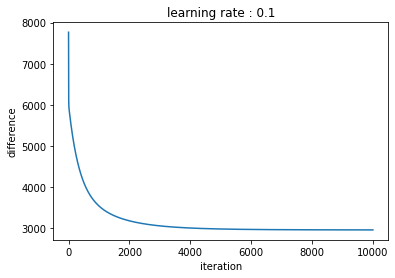

(1, 6, 8)
2743.925673139092


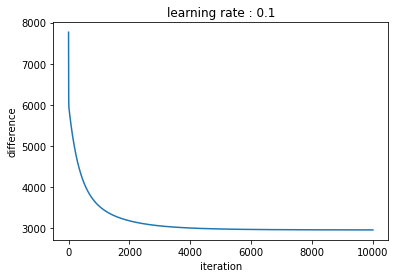

(1, 6, 9)
2743.921929353011


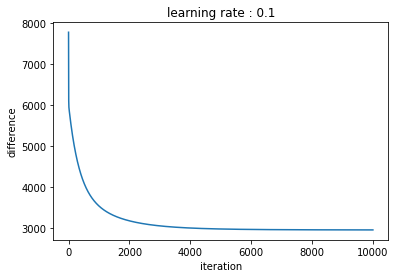

(1, 7, 8)
2743.943871640198


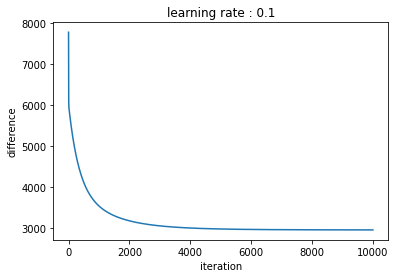

(1, 7, 9)
2743.9390285573327


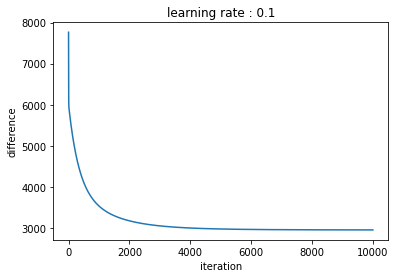

(1, 8, 9)
2743.9395923676325


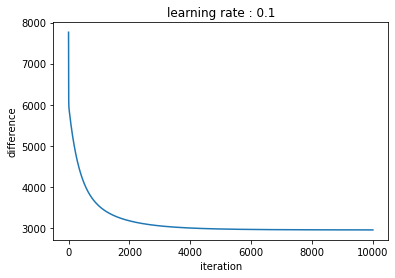

(2, 3, 4)
2743.9474009171468


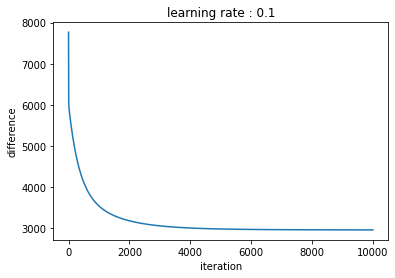

(2, 3, 5)
2743.936003867836


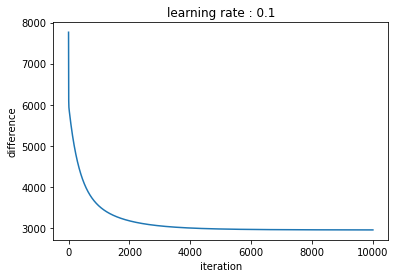

(2, 3, 6)
2743.934148444675


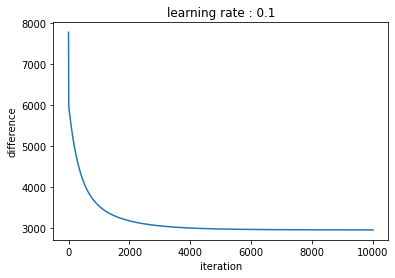

(2, 3, 7)
2743.9357978568514


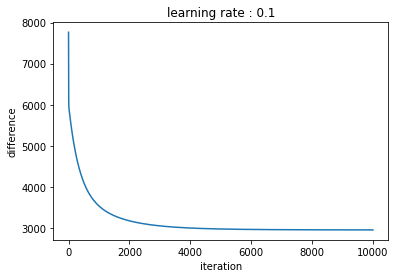

(2, 3, 8)
2743.949162835637


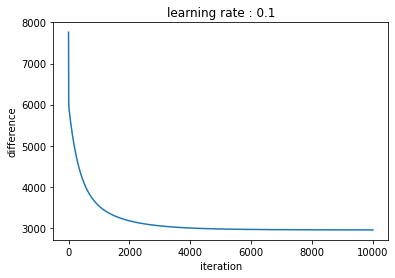

(2, 3, 9)
2743.91602955139


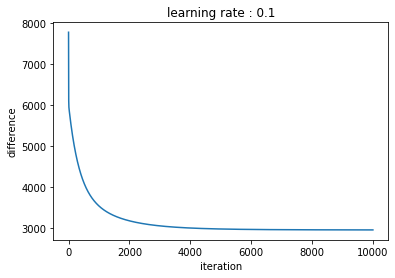

(2, 4, 5)
2743.944807189463


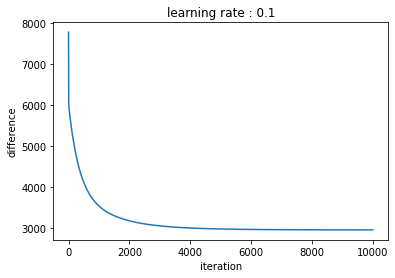

(2, 4, 6)
2743.928725990538


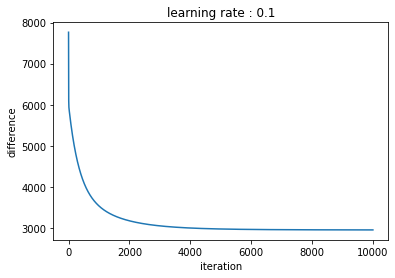

(2, 4, 7)
2743.9146294313173


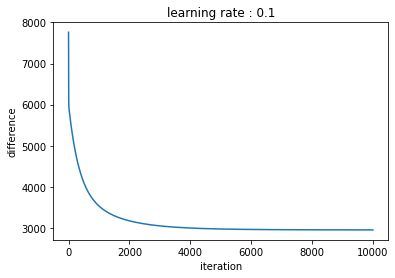

(2, 4, 8)
2743.941168691125


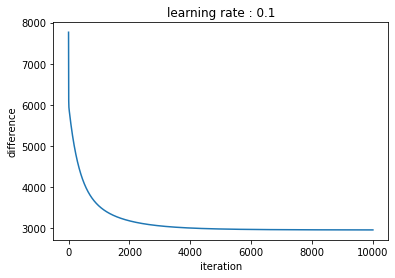

(2, 4, 9)
2743.9234035662435


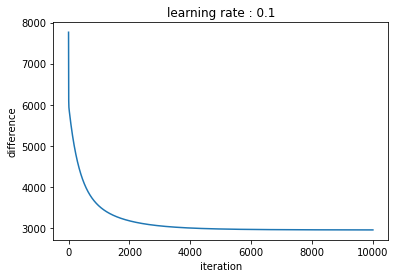

(2, 5, 6)
2743.9409720895824


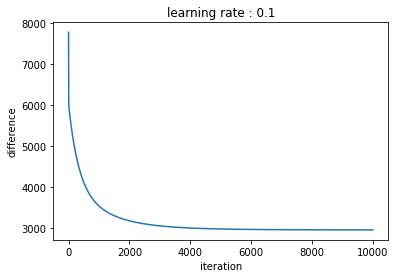

(2, 5, 7)
2743.9267381292616


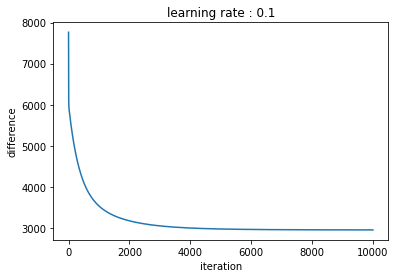

(2, 5, 8)
2743.9547367644673


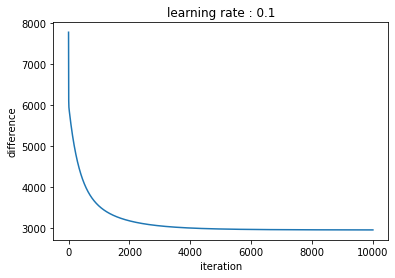

(2, 5, 9)
2743.9199928850867


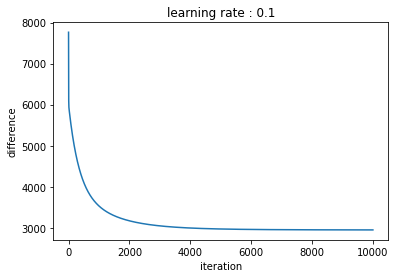

(2, 6, 7)
2743.928308745688


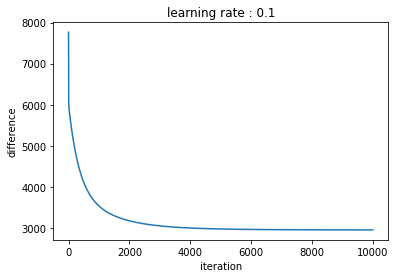

(2, 6, 8)
2743.9514543851783


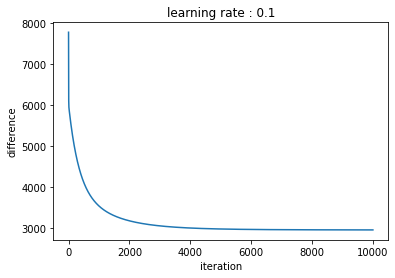

(2, 6, 9)
2743.9397324210663


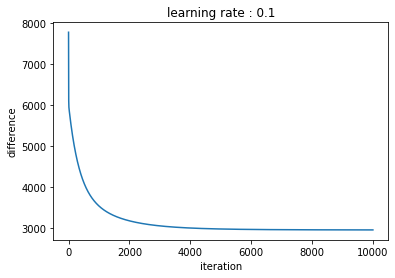

(2, 7, 8)
2743.944811749698


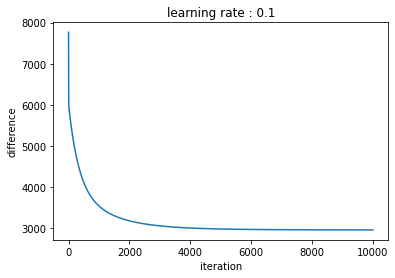

(2, 7, 9)
2743.949861044816


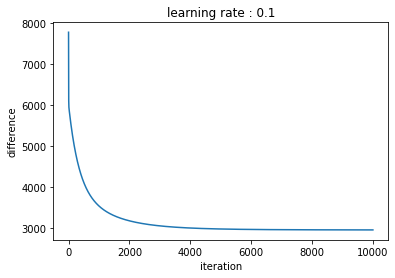

(2, 8, 9)
2743.930737589306


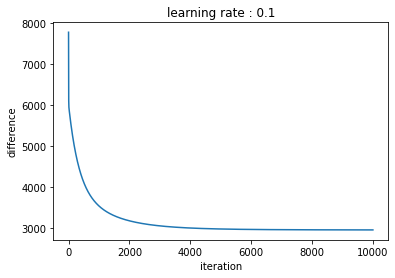

(3, 4, 5)
2743.932506724327


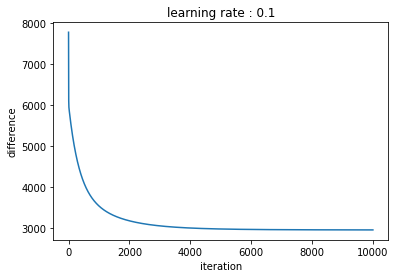

(3, 4, 6)
2743.943931788957


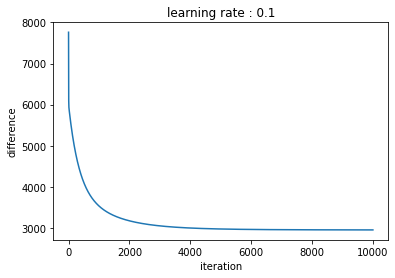

(3, 4, 7)
2743.9484301553857


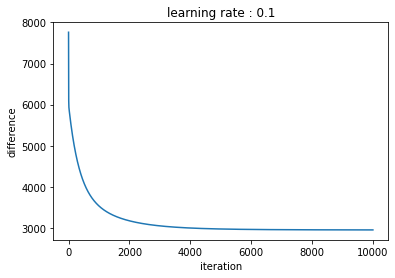

(3, 4, 8)
2743.92047984242


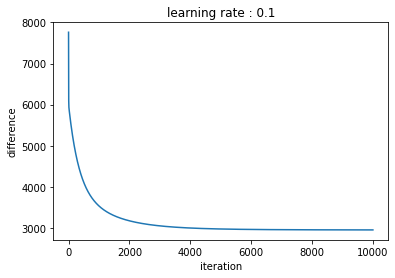

(3, 4, 9)
2743.927202642866


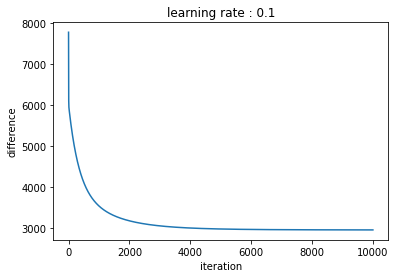

(3, 5, 6)
2743.949590686319


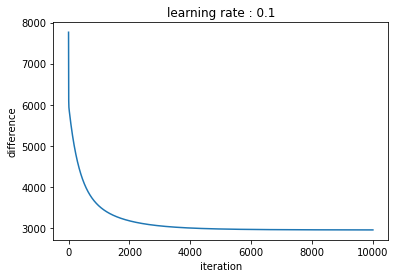

(3, 5, 7)
2743.933696847633


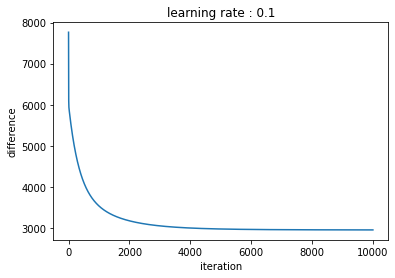

(3, 5, 8)
2743.9583226523573


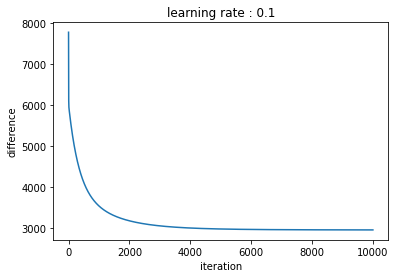

(3, 5, 9)
2743.9238745683215


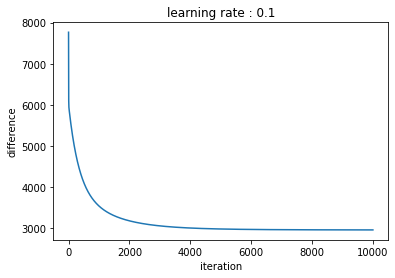

(3, 6, 7)
2743.9400494920965


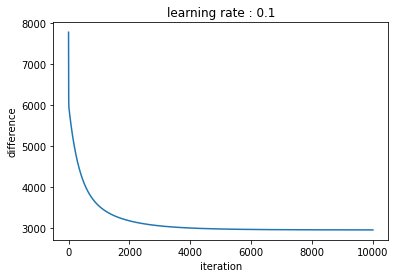

(3, 6, 8)
2743.926622243946


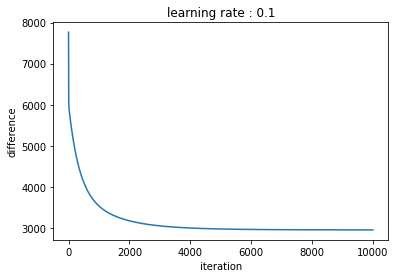

(3, 6, 9)
2743.942426027297


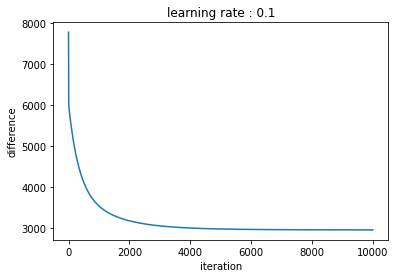

(3, 7, 8)
2743.9316464261033


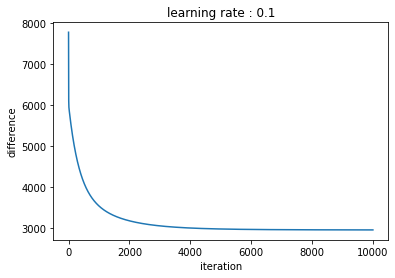

(3, 7, 9)
2743.9340564335102


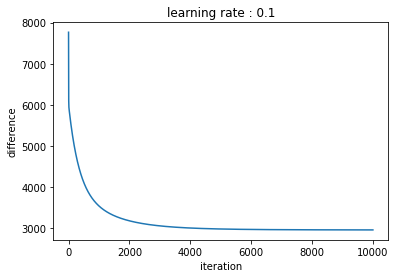

(3, 8, 9)
2743.9379015180575


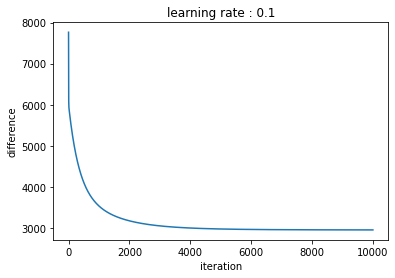

(4, 5, 6)
2743.936879938945


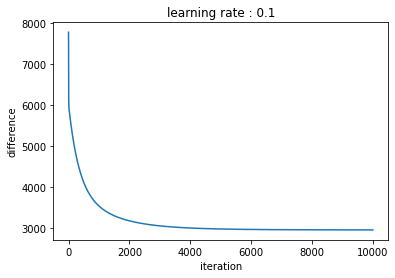

(4, 5, 7)
2743.927075107216


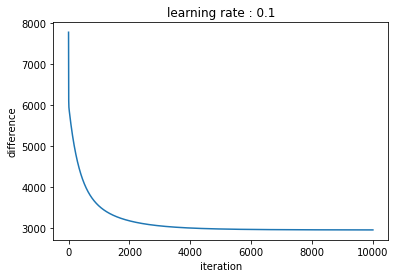

(4, 5, 8)
2743.9377058138957


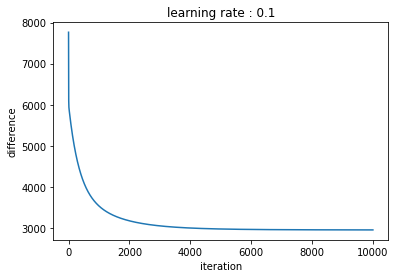

(4, 5, 9)
2743.9382398405237


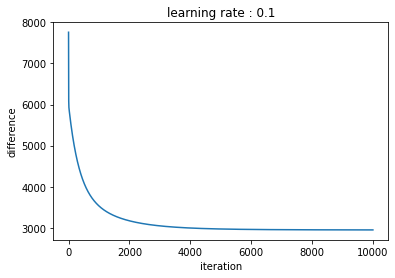

(4, 6, 7)
2743.913304750581


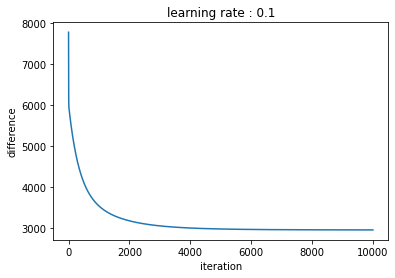

(4, 6, 8)
2743.924664349343


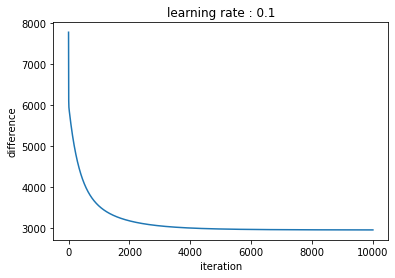

(4, 6, 9)
2743.9456202289925


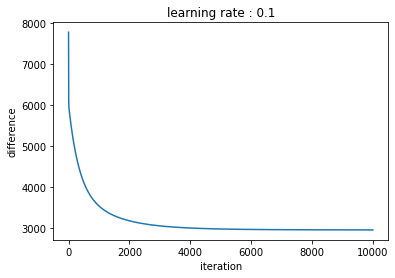

(4, 7, 8)
2743.9397899586465


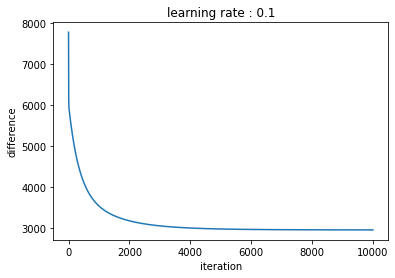

(4, 7, 9)
2743.941375893251


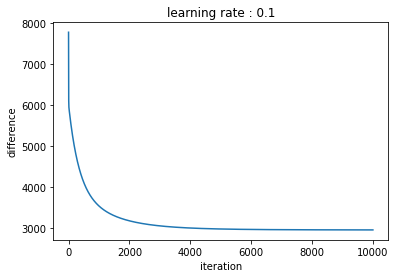

(4, 8, 9)
2743.9195854139575


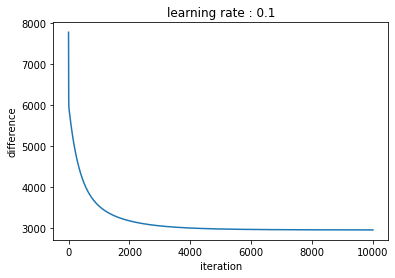

(5, 6, 7)
2743.9320742379914


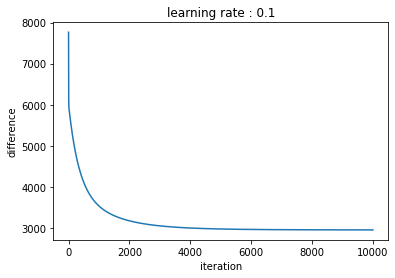

(5, 6, 8)
2743.9387173051473


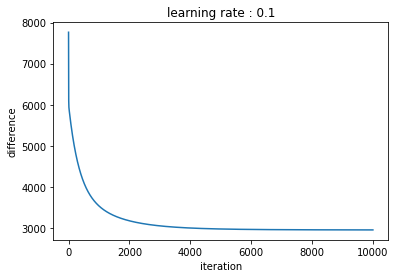

(5, 6, 9)
2743.918943747784


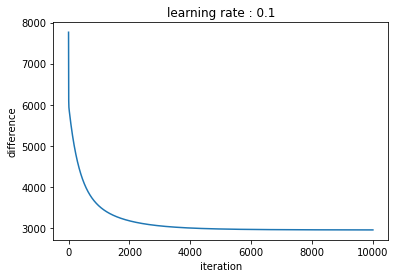

(5, 7, 8)
2743.918801217835


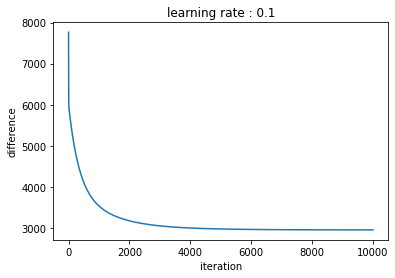

(5, 7, 9)
2743.943627854034


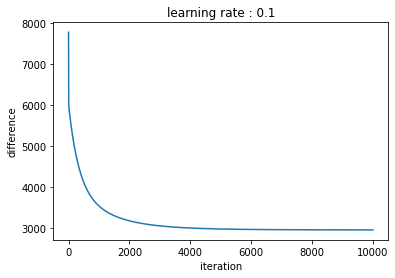

(5, 8, 9)
2743.920479593587


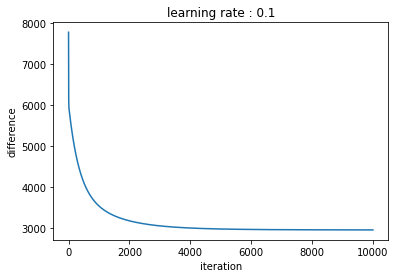

(6, 7, 8)
2743.9347489049574


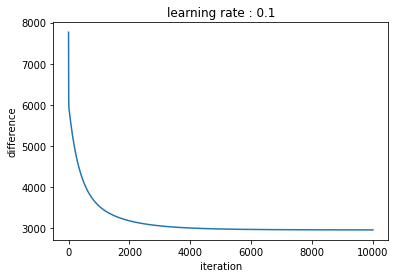

(6, 7, 9)
2743.901631642238


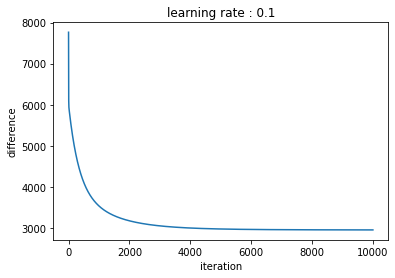

(6, 8, 9)
2743.9454999592153


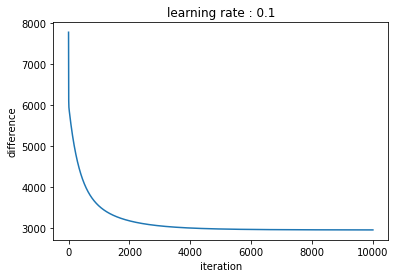

(7, 8, 9)
2743.934014522889
[2743.9395266228444, 2743.9408053919237, 2743.9312488676264, 2743.934905646203]


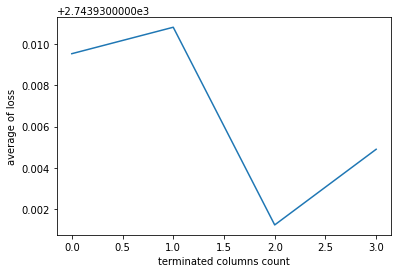

In [25]:
#finding combination of columns, setting learning rate is 0.1
from itertools import combinations

def terminate_col(exception_size):
    column = [i for i in range(10)]
    terminate = list(combinations(column, exception_size))
    
    mae = []
    rate = [0.1]
    print(rate)
    for i in range(len(terminate)):
        df_X = diabetes.data
        df_y = diabetes.target
        df_X = np.array(df_X)
        df_y = np.array(df_y)
        df_X = np.delete(df_X, terminate[i], axis=1)
        
        X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=1017)
        size_of_train_data = len(X_train)
        size_of_test_data = len(X_test)
        size_of_column = len(X_train[0])
    
        fit(w, X_train, b, y_train, rate, mae)
        print(terminate[i])
        print(mae[len(mae)-1])
    return mae


mae_list = []
for i in range(4): 
    mae = terminate_col(i)
    mae_list.append(np.mean(mae))
    
print(mae_list)
plt.xlabel("terminated columns count")
plt.ylabel("average of loss")
plt.plot(mae_list)

# 10) finding which columns is critical data

[0.1]


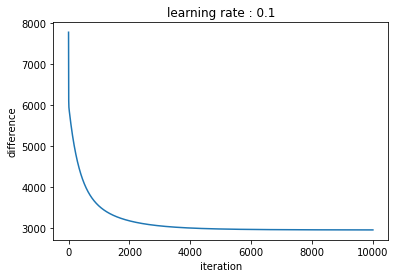

(0, 1)
2743.9295590144698


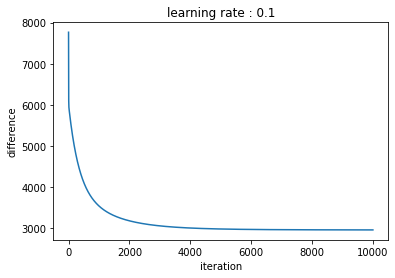

(0, 2)
2743.936178201216


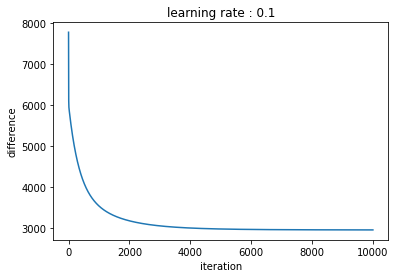

(0, 3)
2743.9395308963426


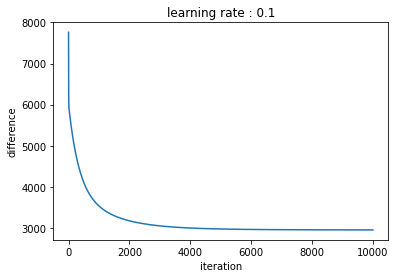

(0, 4)
2743.930440580911


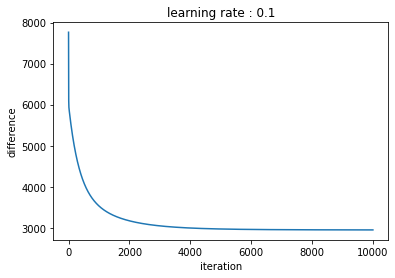

(0, 5)
2743.933543774639


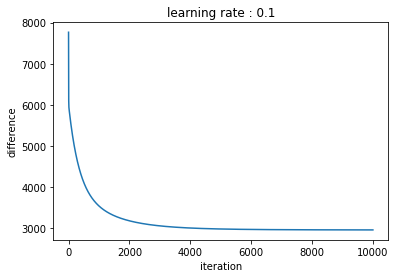

(0, 6)
2743.931786427011


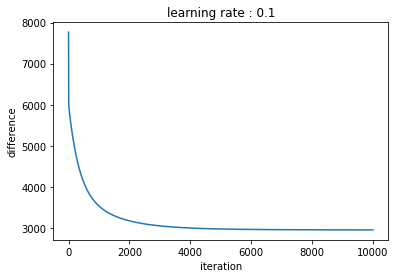

(0, 7)
2743.941575203807


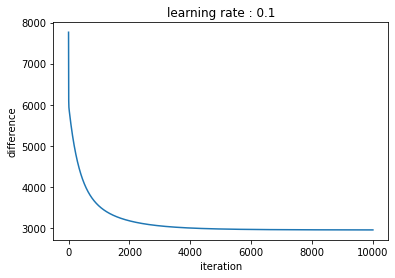

(0, 8)
2743.9277994547447


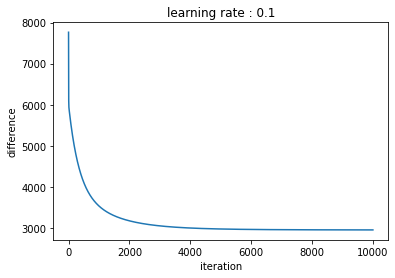

(0, 9)
2743.9417951451433


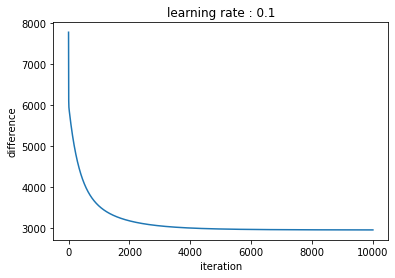

(1, 2)
2743.930809190886


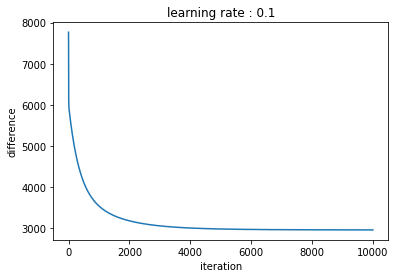

(1, 3)
2743.9260450786


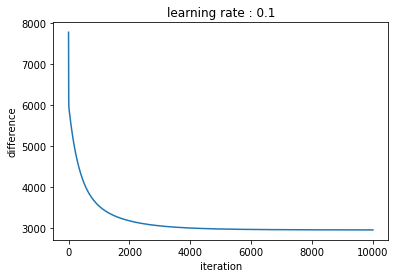

(1, 4)
2743.9492840626017


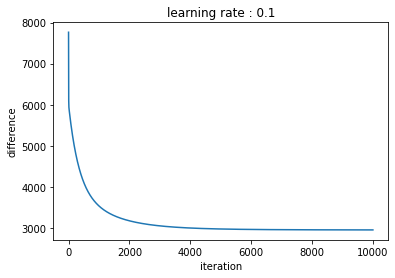

(1, 5)
2743.940576827446


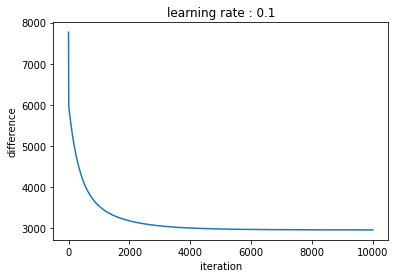

(1, 6)
2743.932388343746


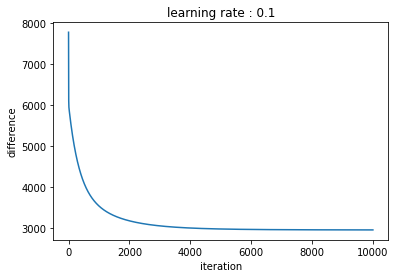

(1, 7)
2743.945325742946


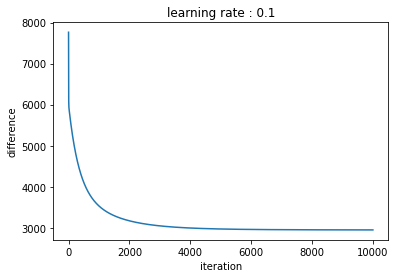

(1, 8)
2743.944746212534


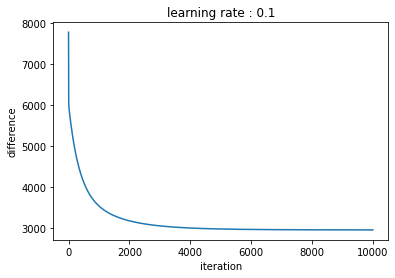

(1, 9)
2743.938471691423


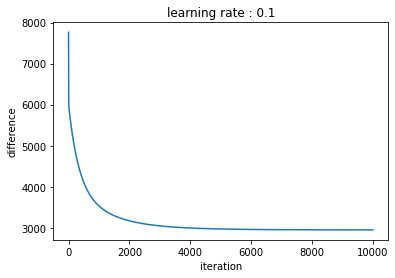

(2, 3)
2743.935942656567


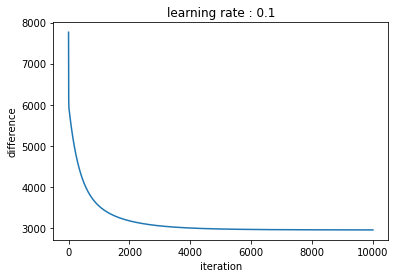

(2, 4)
2743.9263688004044


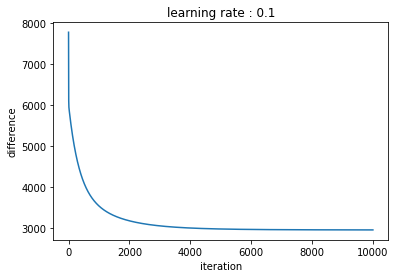

(2, 5)
2743.9381599020307


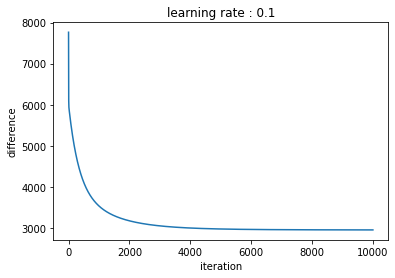

(2, 6)
2743.9313509722665


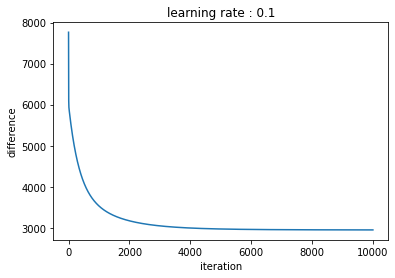

(2, 7)
2743.927855740039


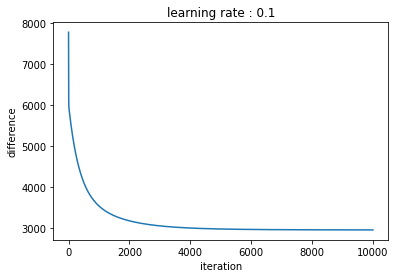

(2, 8)
2743.9361124446064


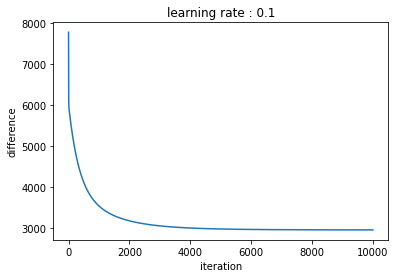

(2, 9)
2743.942651599078


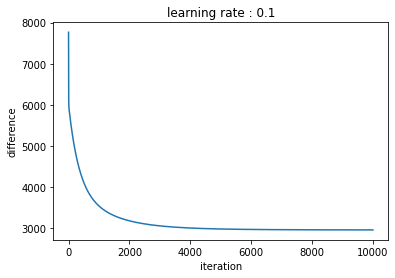

(3, 4)
2743.9189573635435


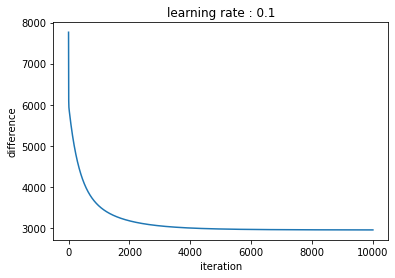

(3, 5)
2743.9293922706156


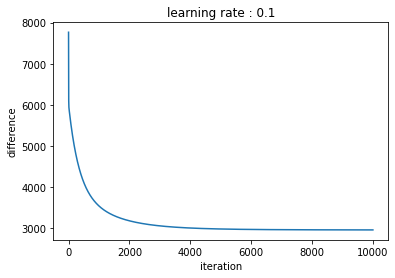

(3, 6)
2743.9417820141616


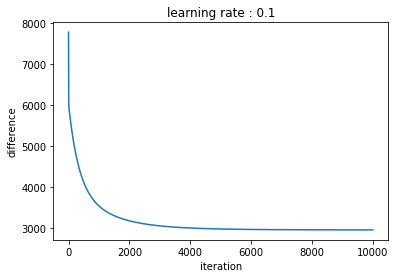

(3, 7)
2743.9293170068945


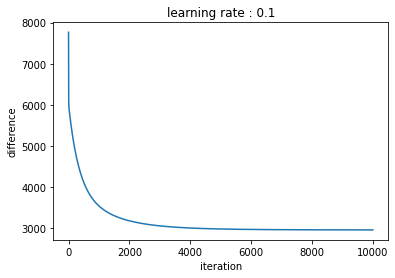

(3, 8)
2743.927263436868


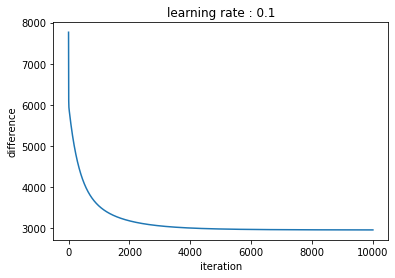

(3, 9)
2743.9291042663485


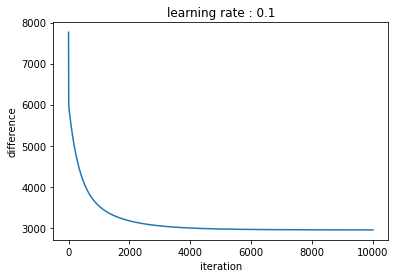

(4, 5)
2743.9430089392663


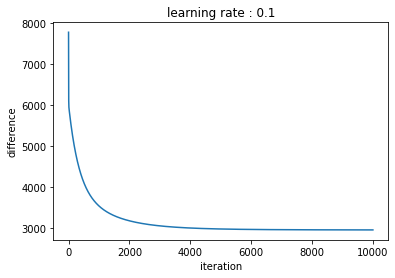

(4, 6)
2743.91609743303


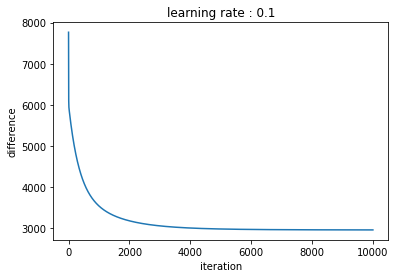

(4, 7)
2743.9290298963556


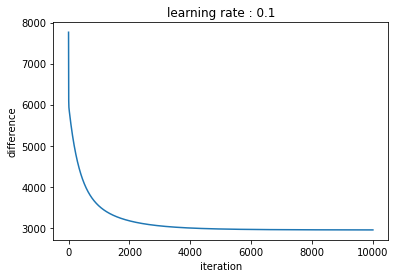

(4, 8)
2743.9356196388703


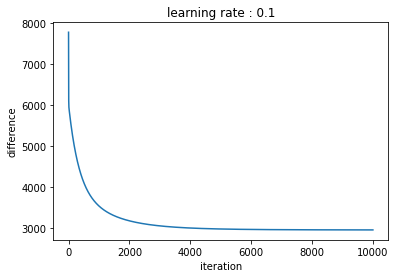

(4, 9)
2743.9585235082413


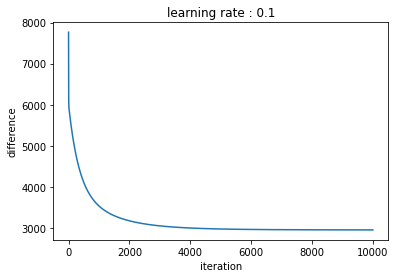

(5, 6)
2743.946462390084


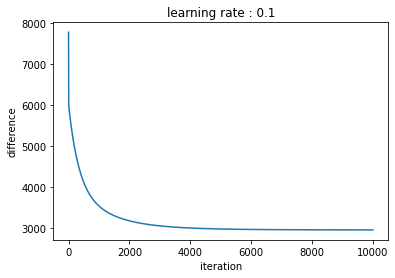

(5, 7)
2743.9478870470703


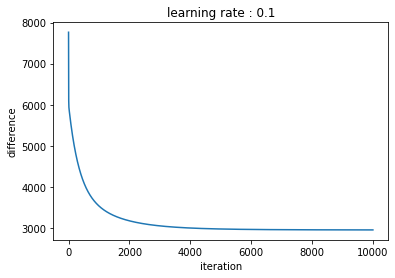

(5, 8)
2743.952022895871


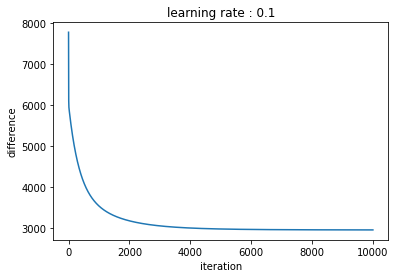

(5, 9)
2743.9424922924813


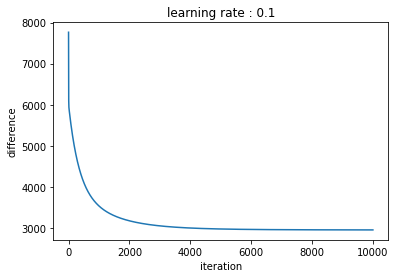

(6, 7)
2743.925376847328


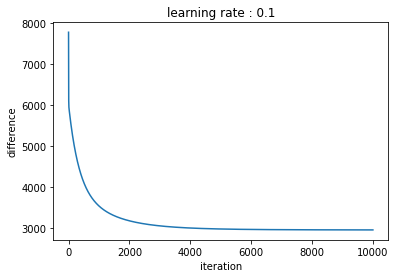

(6, 8)
2743.9195628141715


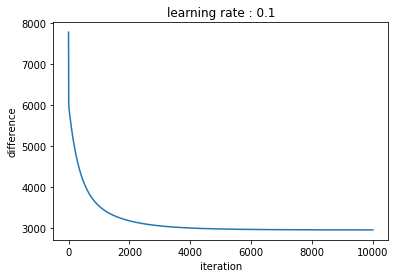

(6, 9)
2743.931438228484


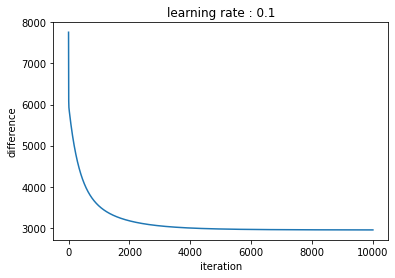

(7, 8)
2743.9349391814403


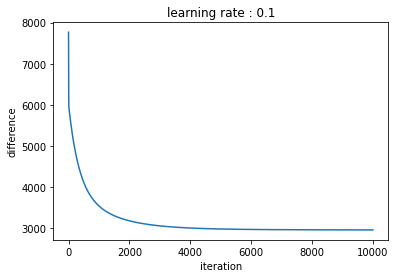

(7, 9)
2743.911202276378


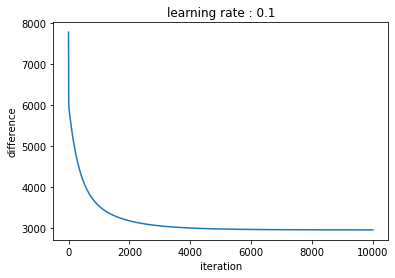

(8, 9)
2743.91361379426


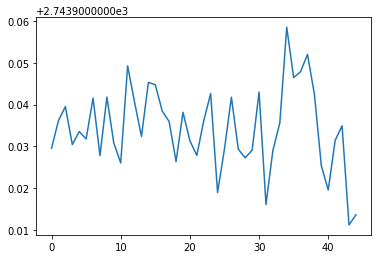

In [26]:
#finding which columns is critical data
mae = terminate_col(2)
plt.plot(mae)

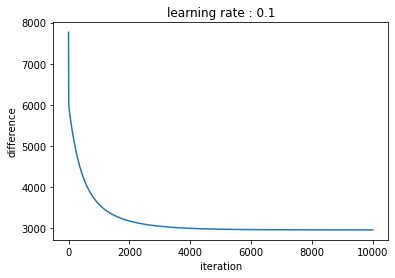

[2765.615036768762]


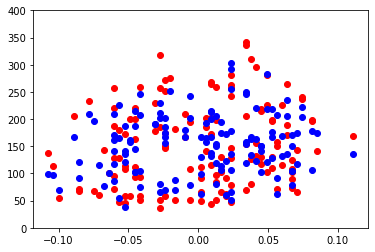

In [28]:
df_X = diabetes.data
df_y = diabetes.target

df_X = np.array(df_X)
df_y = np.array(df_y)

df_X = np.delete(df_X, [7, 9], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=7)

size_of_train_data = len(X_train)
size_of_test_data = len(X_test)
size_of_column = len(X_train[0])

rate = [0.1]
ITERATION = 10000
w = np.random.rand(size_of_column)
b = 100
mae_rate = []
w, b = fit(w, X_train, b, y_train, rate, mae_rate)
print(mae_rate)

predict = model(w, X_test, b)

plt.ylim([0, 400])
plt.scatter(X_test[:, 0], y_test, color = 'red')
plt.scatter(X_test[:, 0], predict, color = 'blue')
plt.show()

# Sikit Learn Linear Regerssion

In [27]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression().fit(X_train, y_train)
y_prediction = lrm.predict(X_test)
print(MSE(y_test, y_prediction))

2791.461291904446


# conculsion
8)에서 0.00001에서 10까지 learning rate의 학습률을 평가했을때 learning rate가 0.1일때 가장 좋은 학습률을 보였다.
9)에서는 하나에서 세개까지의 feature factor들을 삭제해가며 가능한 모든 factor들의 학습률에 대한 조합을 찾았다. 이때 두개의 칼럼을 삭제했을때 가장 좋은 평균을 나타내었지만 유의미한 결과로 보이진 않았다.
10)에서는 index 7, 9번에 해당하는 factor를 제거했을 때 최선의 학습률을 보였다.
그 다음 노드에서는 learnning rate 0.1, index 7,9번 factor 삭제, iteration 10000에서 최종적인 모델을 진행하였고, 결과적으로 'MAE가 2765.615036768762' 인 모델을 구할 수 있었다.
최종적으로 sikit learn의 선형회귀 모델과 비교했을때 sikit learn은 2791.461291904446의 오차를 보였음으로 비교적 sikit learn보다 괜찮은 모델을 구하였으나, 큰 의미가 있는 차이는 없었다.

특이점은 학습데이터와 테스트데이터를 구분하는 점에 있어 random state에 따라 오차가 굉장히 큰 변화를 보였다.